# This notebook contains an example of denoising a signal using Cissa. There are multiple methods to do this in pyCissa, but this notebook deals with the number of significant components, and proportion of variance approaches.

In [1]:
#importing required packages
import pandas as pd
import os
dir_path = os.path.abspath('')
os.chdir('../../..')
home_path = os.path.abspath('')
os.chdir('./pycissa/processing/cissa')
from cissa import Cissa
os.chdir(home_path)

In [2]:
## Read data file  (source is the Ministry of Economy of Spain.)
data = pd.read_excel(home_path + r'/data/EPC.xlsx',sheet_name = 'Data')

In [3]:
#create the cissa object
cissa_object = Cissa(t=data['Date'],x=data['Electric power consumption in Spain'])

## grouping_type = 'smallest_n'

In [4]:
#Run auto denoise with L = 96 (8 years), grouping_type = 'smallest_n' which removes the n smallest variance components 
cissa_object.auto_denoise(L=96,grouping_type = 'smallest_n', number_of_groups_to_drop = 40)

## We dropped 40 out of 48 components - you can try different number of components to drop. The more you drop the smoother the denoised signal.

In [5]:
print('''COMPONENT VARIANCE''')
print(f'''TREND   : {cissa_object.results.get('cissa').get('noise component tests').get('trend_share')}%''')
print(f'''PERIODIC: {cissa_object.results.get('cissa').get('noise component tests').get('periodic_share')}%''')
print(f'''NOISE   : {cissa_object.results.get('cissa').get('noise component tests').get('noise_share')}%''')

COMPONENT VARIANCE
TREND   : 89.46614410358026%
PERIODIC: 8.811325136017205%
NOISE   : 1.4657695556892472%


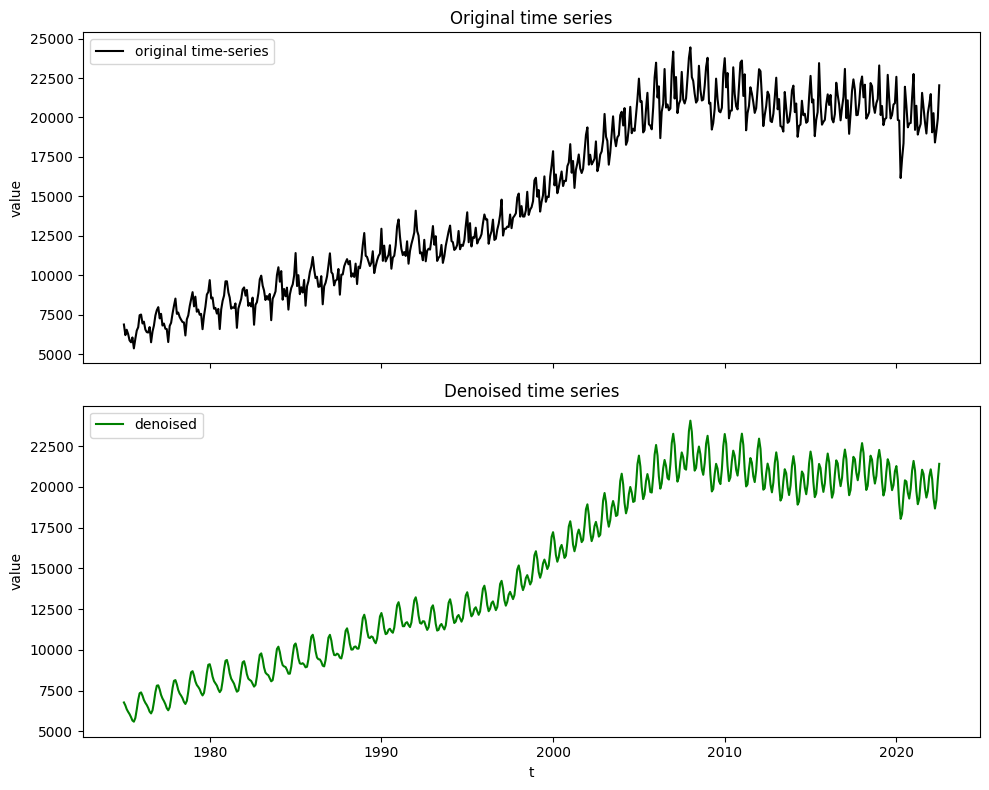

In [6]:
#plot the denoised result
cissa_object.figures.get('cissa').get('figure_denoised')

## grouping_type = 'smallest_proportion'

In [7]:
#Run auto denoise with L = 96 (8 years), grouping_type = 'smallest_proportion' which is controlled by the parameter eigenvalue_proportion
print('''eigenvalue_proportion : float, optional
            DESCRIPTION. The default is 0.9. Only used of grouping type = 'smallest_proportion'
                    There are two options:
                    1) A number between 0 & 1. This number represents the accumulated
                    share of the psd (power spectrum distribution) achieved with the sum of the share associated to
                    the largest eigenvalues. The function computes the trend and periodic components
                    as these components, and the remaining as noise.
                    2) A number between -1 & 0. It is a percentile (in positive) of
                    the psd. The function classifies as trend/periodic the componentes by frequency
                    whose psd is greater that this percentile, and noise otherwise.''')


eigenvalue_proportion : float, optional
            DESCRIPTION. The default is 0.9. Only used of grouping type = 'smallest_proportion'
                    There are two options:
                    1) A number between 0 & 1. This number represents the accumulated
                    share of the psd (power spectrum distribution) achieved with the sum of the share associated to
                    the largest eigenvalues. The function computes the trend and periodic components
                    as these components, and the remaining as noise.
                    2) A number between -1 & 0. It is a percentile (in positive) of
                    the psd. The function classifies as trend/periodic the componentes by frequency
                    whose psd is greater that this percentile, and noise otherwise.


## accumulated share of the psd

In [14]:
cissa_object.auto_denoise(L=96,grouping_type = 'smallest_proportion', eigenvalue_proportion = 0.95)

In [15]:
print('''COMPONENT VARIANCE''')
print(f'''TREND   : {cissa_object.results.get('cissa').get('noise component tests').get('trend_share')}%''')
print(f'''PERIODIC: {cissa_object.results.get('cissa').get('noise component tests').get('periodic_share')}%''')
print(f'''NOISE   : {cissa_object.results.get('cissa').get('noise component tests').get('noise_share')}%''')

COMPONENT VARIANCE
TREND   : 89.46614410358026%
PERIODIC: 5.827051840278195%
NOISE   : 4.450042851428258%


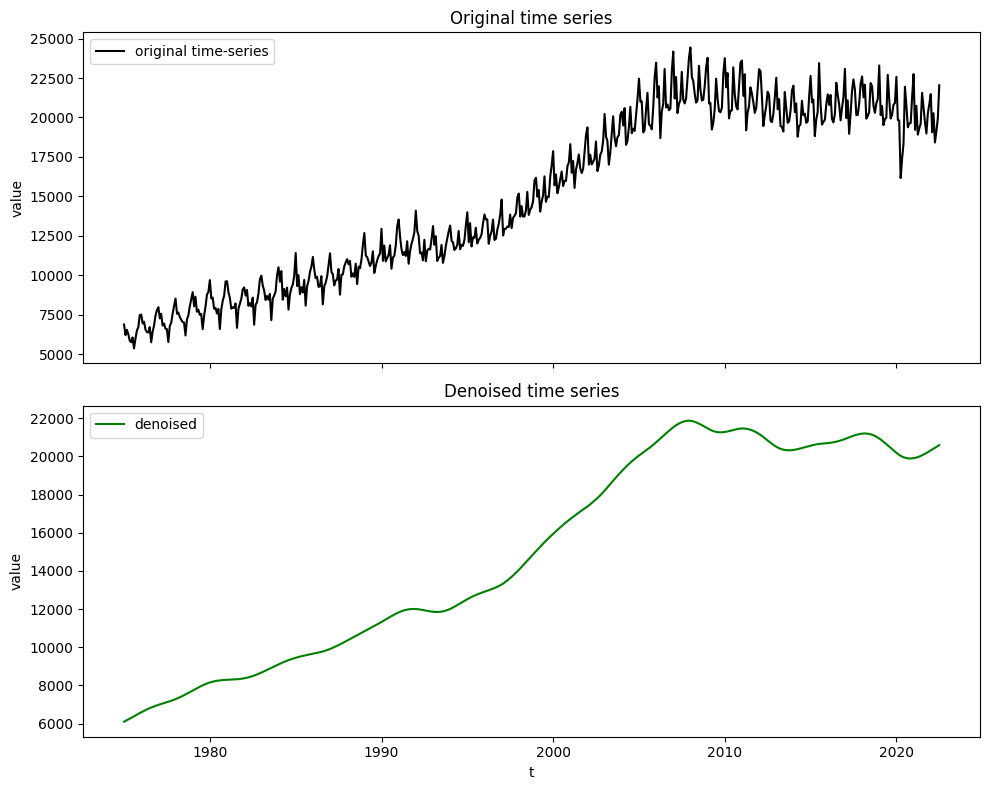

In [16]:
cissa_object.figures.get('cissa').get('figure_denoised')

## percentile of psd

In [11]:
cissa_object.auto_denoise(L=96,grouping_type = 'smallest_proportion', eigenvalue_proportion = -0.9)

In [12]:
print('''COMPONENT VARIANCE''')
print(f'''TREND   : {cissa_object.results.get('cissa').get('noise component tests').get('trend_share')}%''')
print(f'''PERIODIC: {cissa_object.results.get('cissa').get('noise component tests').get('periodic_share')}%''')
print(f'''NOISE   : {cissa_object.results.get('cissa').get('noise component tests').get('noise_share')}%''')

COMPONENT VARIANCE
TREND   : 89.46614410358026%
PERIODIC: 7.742432518067191%
NOISE   : 2.5346621736392594%


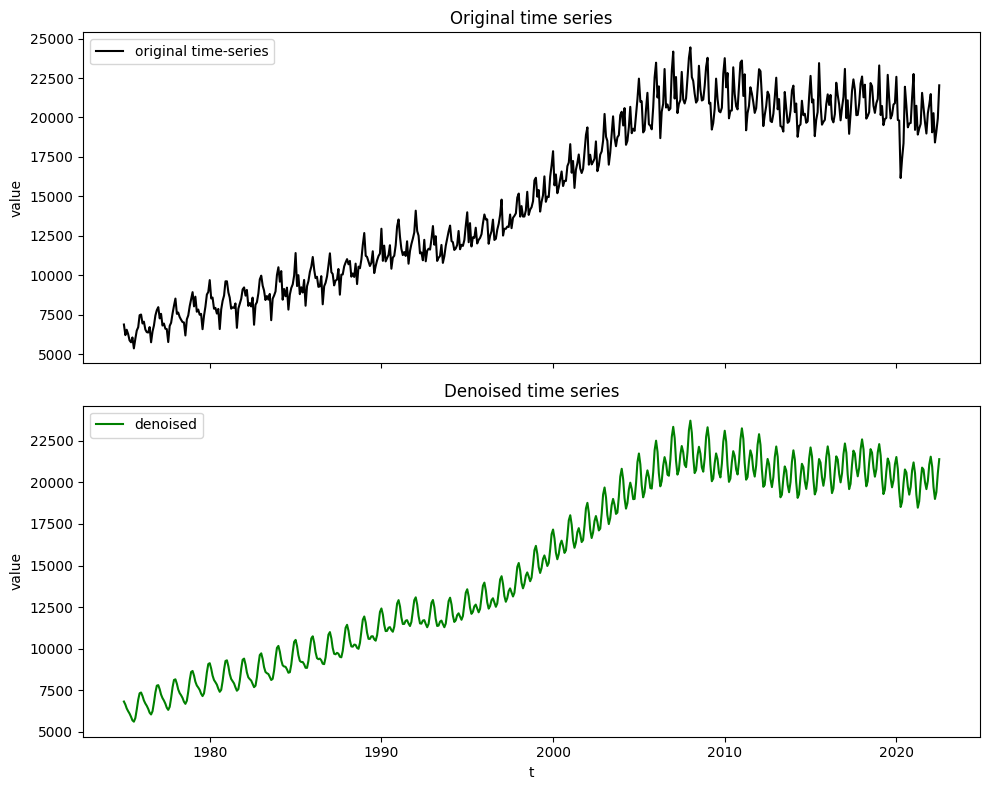

In [13]:
cissa_object.figures.get('cissa').get('figure_denoised')